# Consulta de datos de un Excel

Tenemos un archivo Excel con la capitalización de datos de las empresas más importantes del IBEX e intentaremos hacer gráficos.

Partimos de esta hoja de cálculo de Excel:
![Captura Excel](captura.jpg)

In [2]:
!pip install pandas

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
xls_path = "empresas-bolsa.xls"

In [8]:
# Le pongo el header=none para que no considere la primera fila (inditex) como encabezado, y entonces pone índices
df = pd.read_excel(xls_path,header=None)
df

,0,1,2,3,4,5
0,"INDUSTRIA DE DISEÑO TEXTIL, SA ""INDITEX""",154710.6,2130.26,25951.8,ES0148396007,IBEX 35
1,"IBERDROLA, S.A.",84644.53,3121.43,34858.07,ES0144580Y14,IBEX 35
2,"BANCO SANTANDER, S.A.",67648.3,2370.84,33409.8,ES0113900J37,IBEX 35
3,"BANCO BILBAO VIZCAYA ARGENTARIA, S.A.",54474.57,1485.38,28861.66,ES0113211835,IBEX 35
4,"CAIXABANK, S.A.",37567.97,900.96,14695.97,ES0140609019,IBEX 35
...,...,...,...,...,...,...
127,BERKELEY ENERGIA LIMITED,87.28,2.27,88.63,AU000000BKY0,IBEX SMALL CAP
128,En el ranking no están incluidas las sociedade...,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN


### Vamos a tener en cuenta las dos primeras columnas (empresa y capitalización), las demás las borramos

In [11]:
df.drop(df.columns[2:], axis=1, inplace=True)
df

,0,1
0,"INDUSTRIA DE DISEÑO TEXTIL, SA ""INDITEX""",154710.6
1,"IBERDROLA, S.A.",84644.53
2,"BANCO SANTANDER, S.A.",67648.3
3,"BANCO BILBAO VIZCAYA ARGENTARIA, S.A.",54474.57
4,"CAIXABANK, S.A.",37567.97
...,...,...
127,BERKELEY ENERGIA LIMITED,87.28
128,En el ranking no están incluidas las sociedade...,NaN
129,NaN,NaN
130,NaN,NaN


### Vamos a poner nombres de columnas adecuado, dejando solo 'Empresa' y 'Capitalización'

In [14]:
df.columns = ['Empresa','Capitalización']
df

,Empresa,Capitalización
0,"INDUSTRIA DE DISEÑO TEXTIL, SA ""INDITEX""",154710.6
1,"IBERDROLA, S.A.",84644.53
2,"BANCO SANTANDER, S.A.",67648.3
3,"BANCO BILBAO VIZCAYA ARGENTARIA, S.A.",54474.57
4,"CAIXABANK, S.A.",37567.97
...,...,...
127,BERKELEY ENERGIA LIMITED,87.28
128,En el ranking no están incluidas las sociedade...,NaN
129,NaN,NaN
130,NaN,NaN


### Nos quedamos con las 50 primeras empresas, las demás las borramos

In [17]:
df.drop(df.index[50:],axis=0,inplace=True)
df

,Empresa,Capitalización
0,"INDUSTRIA DE DISEÑO TEXTIL, SA ""INDITEX""",154710.6
1,"IBERDROLA, S.A.",84644.53
2,"BANCO SANTANDER, S.A.",67648.3
3,"BANCO BILBAO VIZCAYA ARGENTARIA, S.A.",54474.57
4,"CAIXABANK, S.A.",37567.97
5,"AMADEUS IT GROUP, S.A.",30724.04
6,FERROVIAL S.E.,30026.35
7,"AENA, S.M.E., S.A.",29610
8,"NATURGY ENERGY GROUP, S.A.",22669.57
9,"TELEFONICA, S.A.",22323.42


### Ahora vamos a intentar mostrar los datos en un gráfico de barras con Matplotlib. Hacen falta las bibliotecas Matplotlib y Numpy, según la documentaciñon en la página web

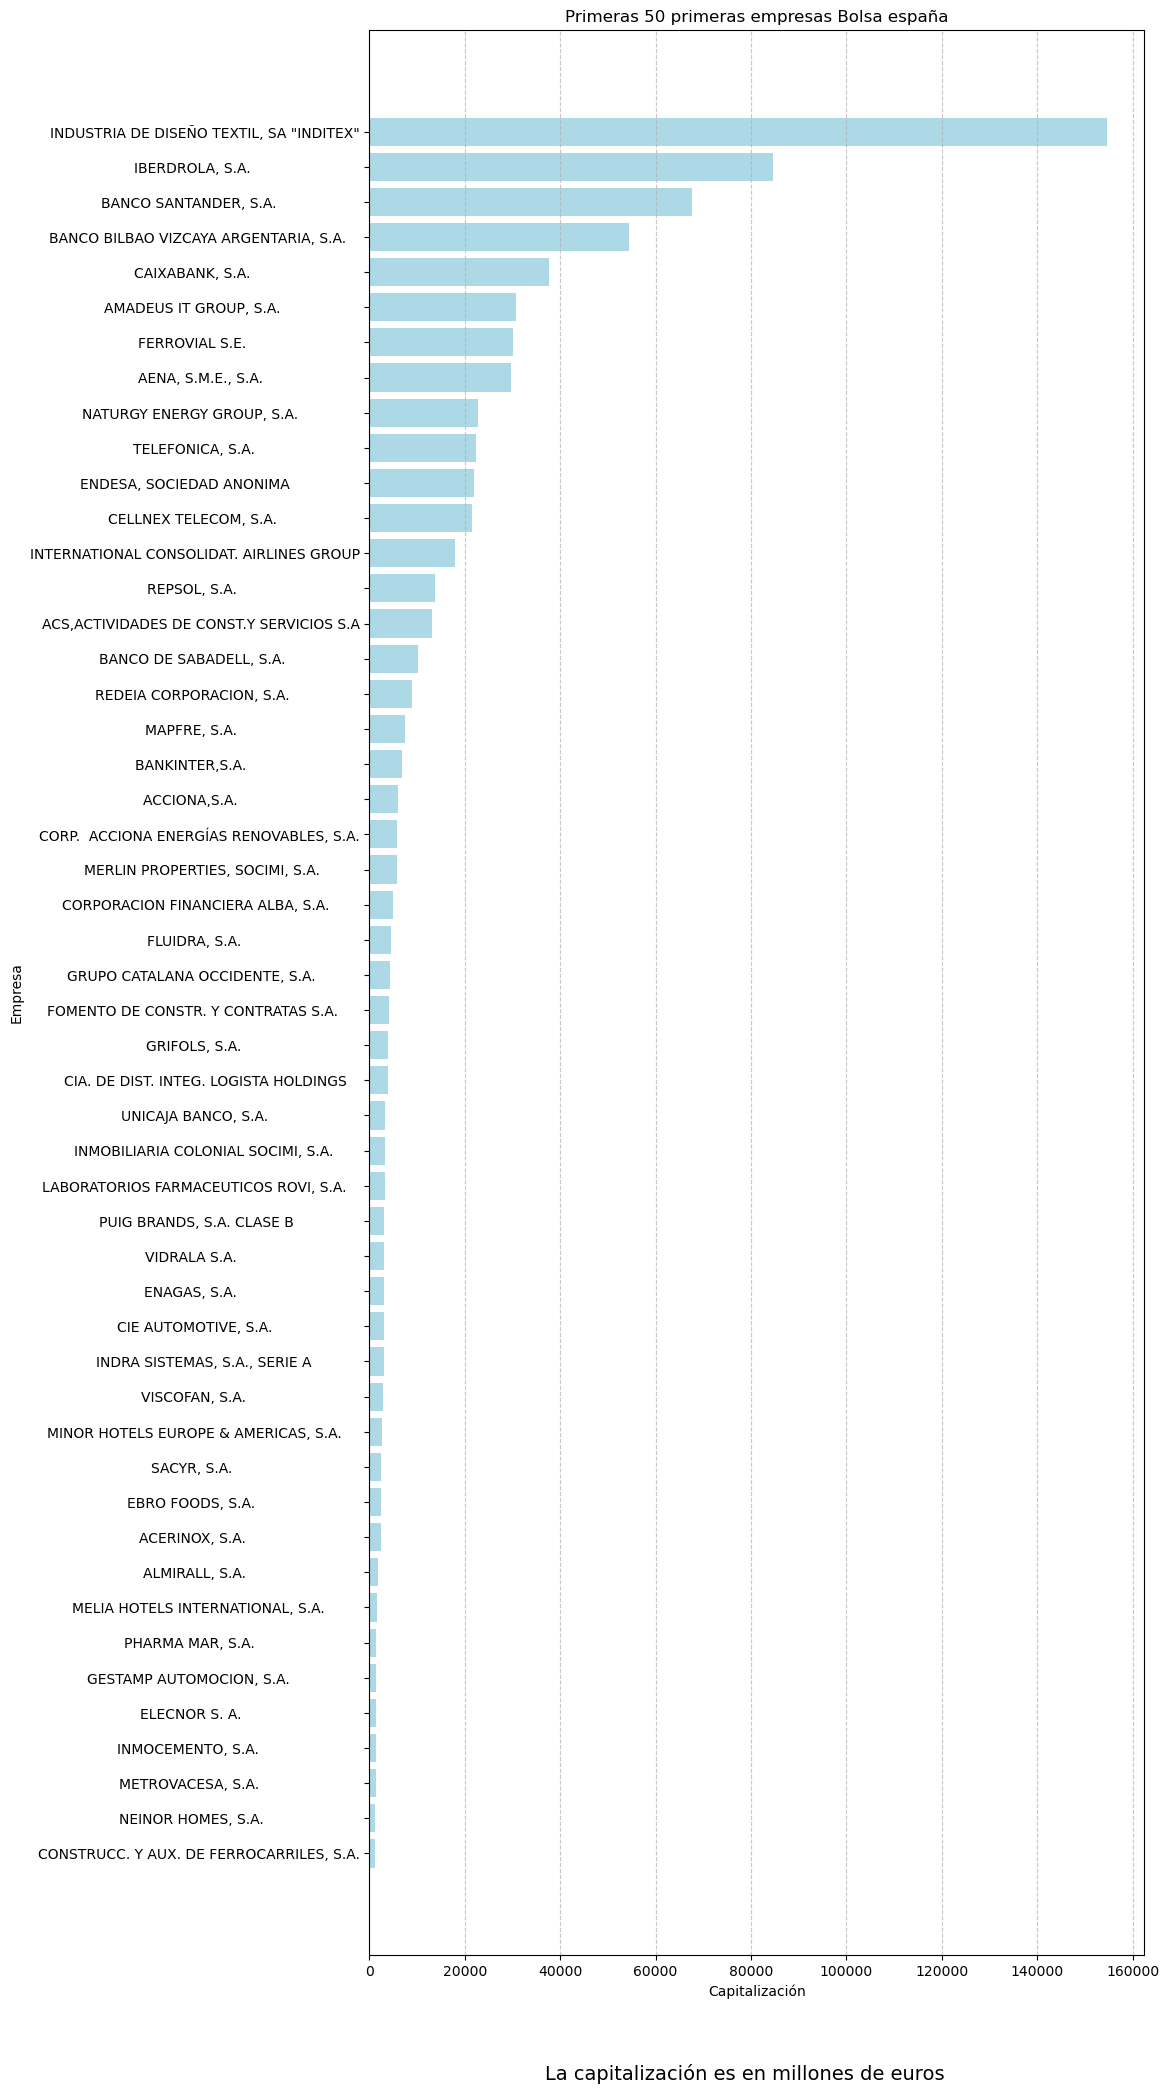

In [133]:
empresas = list(df['Empresa'])
valores = list(df['Capitalización'])
# Le damos la anchura y altura en pulgadas
plt.figure(figsize=(10, 25))
# eje y = empresas / eje x = valores / hight = tamaño de la barra
plt.barh(empresas, valores, color='lightblue',height=0.8)

# Esta siguiente instrucción es para poner los de mayor valor arriba, que aparecían abajo
plt.gca().invert_yaxis()
plt.title('Primeras 50 primeras empresas Bolsa españa')
plt.xlabel('Capitalización')
plt.ylabel('Empresa')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.figtext(0.5, 0.06, 'La capitalización es en millones de euros', ha='center', fontsize=14)

plt.show()